In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images into a 1D array
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert target labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a Multilayer Perceptron model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 digit classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


11490434/11490434 [==============================] - 4s 0us/step
Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2376 - accuracy: 0.9287 - val_loss: 0.1285 - val_accuracy: 0.9614
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.1047 - val_accuracy: 0.9665
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0730 - accuracy: 0.9777 - val_loss: 0.0903 - val_accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.0924 - val_accuracy: 0.9711
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0737 - accuracy: 0.9787
Test accuracy: 97.87%


Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2392 - accuracy: 0.9313 - val_loss: 0.1464 - val_accuracy: 0.9523
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1002 - accuracy: 0.9702 - val_loss: 0.0953 - val_accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0714 - accuracy: 0.9774 - val_loss: 0.0932 - val_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0553 - accuracy: 0.9830 - val_loss: 0.0743 - val_accuracy: 0.9764
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0429 - accuracy: 0.9866 - val_loss: 0.0792 - val_accuracy: 0.9766


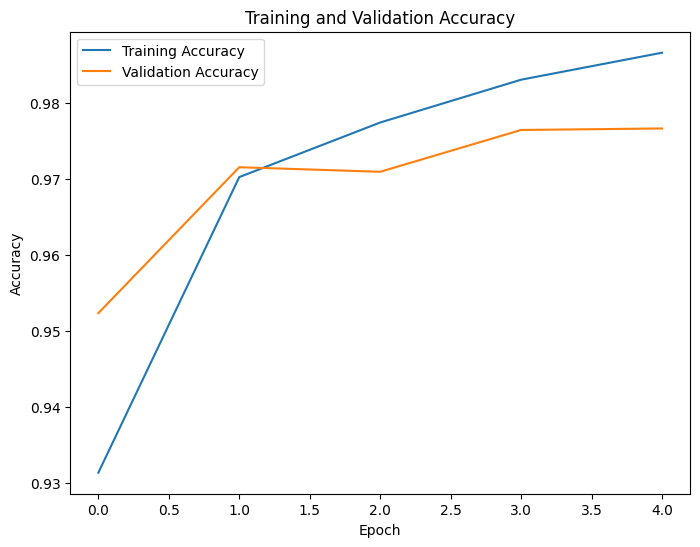

313/313 [==============================] - 1s 4ms/step - loss: 0.0792 - accuracy: 0.9766
Test accuracy: 97.66%
1/1 [==============================] - 1s 518ms/step


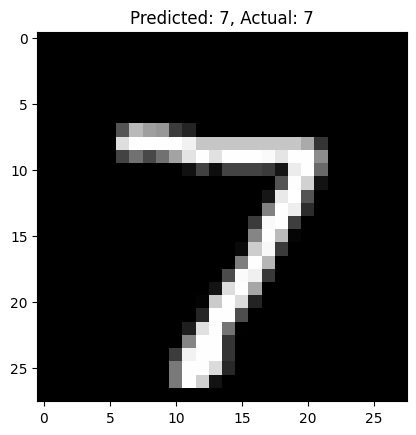

1/1 [==============================] - 0s 54ms/step


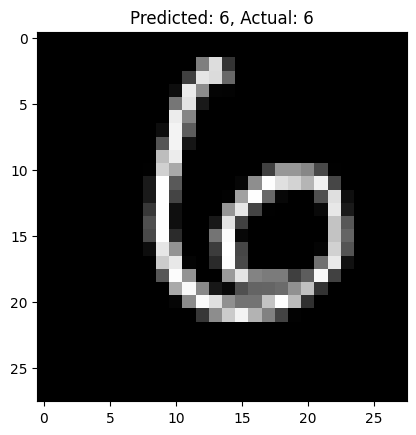

1/1 [==============================] - 0s 52ms/step


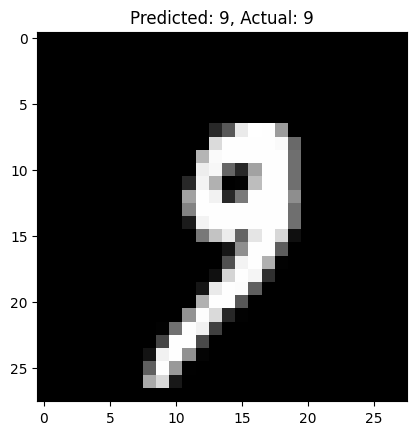

1/1 [==============================] - 0s 44ms/step


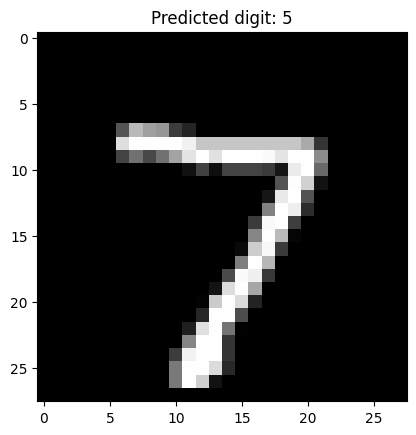

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten the images into a 1D array
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Convert target labels to categorical one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a Multilayer Perceptron model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 10 output neurons for 10 digit classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))



# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Function to predict and visualize results
def predict_and_visualize(index):
    prediction = model.predict(x_test[index].reshape(1, -1))
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(y_test[index])

    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Actual: {actual_label}')
    plt.show()

# Visualize some predictions
predict_and_visualize(0)
predict_and_visualize(100)
predict_and_visualize(1000)

# Interactive prediction
def predict_new_digit(new_digit):
    new_digit = np.array(new_digit).reshape(1, -1) / 255.0
    prediction = model.predict(new_digit)
    predicted_label = np.argmax(prediction)
    
    plt.imshow(new_digit.reshape(28, 28), cmap='gray')
    plt.title(f'Predicted digit: {predicted_label}')
    plt.show()

# Example of interactive prediction
new_digit_input = x_test[0]  # Change this to test other digits
predict_new_digit(new_digit_input)
